<a href="https://colab.research.google.com/github/farhanabrar/DSClass/blob/main/TUGAS3/grafik_corelationAndCausation_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/content/Sample_Superstore.csv'
df = pd.read_csv(path, encoding='windows-1254')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f909548e1d0>]],
      dtype=object)

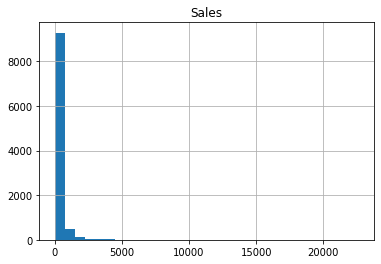

In [6]:
df.hist(column='Sales', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9081169c10>,
      dtype=object)

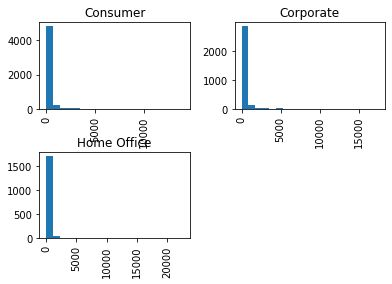

In [8]:
df.hist(column='Sales', by='Segment', bins=20)

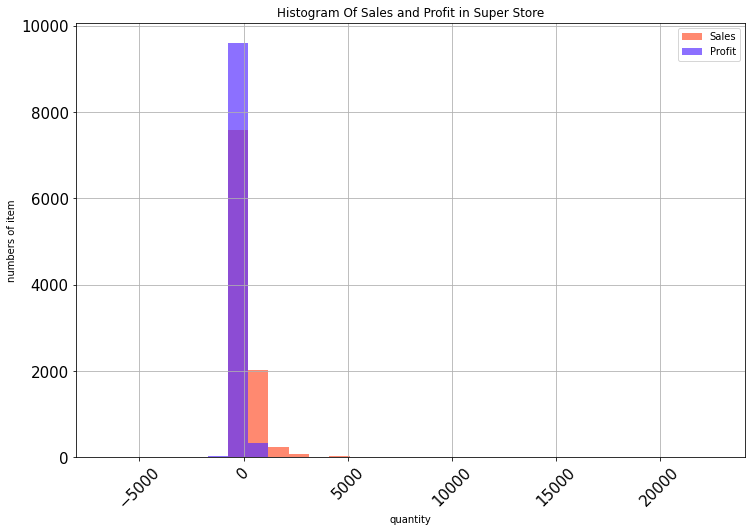

In [16]:
df[['Sales','Profit']].plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Histogram Of Sales and Profit in Super Store',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#FF5733', '#5C33FF'])
plt.xlabel('quantity')
plt.ylabel("numbers of item");

In [17]:
from scipy import stats

In [19]:
pearson_coef, p_value = stats.pearsonr(df['Quantity'], df['Sales'])
print("the pearson correlation coefficient is", pearson_coef, " with a P-value of p= ", p_value)

the pearson correlation coefficient is 0.20079477137389753  with a P-value of p=  2.0199348714778167e-91


In [22]:
pearson_coef, p_value = stats.pearsonr(df['Profit'], df['Sales'])
print("the pearson correlation coefficient is", pearson_coef, " with a P-value of p= ", p_value)

the pearson correlation coefficient is 0.4790643497377061  with a P-value of p=  0.0


In [24]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

(0.0, 9149.9737)

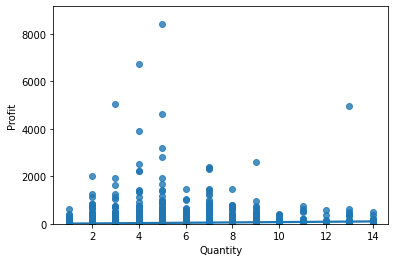

In [25]:
sns.regplot(x="Quantity", y="Profit", data=df)
plt.ylim(0,)

jumlah atau quantity tidak terlalu mempengaruhi profit atau pendapatan

In [26]:
df[["Quantity", "Profit"]].corr()

,Quantity,Profit
Quantity,1.000000,0.066253
Profit,0.066253,1.000000


In [27]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [28]:
df_group_one = df[['Region','Segment','Sales']]

In [29]:
df_group_one = df_group_one.groupby(['Region'],as_index=False).mean()
df_group_one

,Region,Sales
0,Central,215.772661
1,East,238.336110
2,South,241.803645
3,West,226.493233


In [30]:
df_gptest = df[['Region','Segment','Sales']]
grouped_test1 = df_gptest.groupby(['Region','Segment',],as_index=False).mean()
grouped_test1

,Region,Segment,Sales
0,Central,Consumer,207.946728
1,Central,Corporate,234.763466
2,Central,Home Office,208.248046
3,East,Consumer,238.875539
4,East,Corporate,228.516929
5,East,Home Office,253.911805
6,South,Consumer,233.390180
7,South,Corporate,238.992025
8,South,Home Office,272.996329
9,West,Consumer,217.033955


In [31]:
grouped_pivot = grouped_test1.pivot(index='Region',columns='Segment')
grouped_pivot

Sales                        
Segment    Consumer   Corporate Home Office
Region                                     
Central  207.946728  234.763466  208.248046
East     238.875539  228.516929  253.911805
South    233.390180  238.992025  272.996329
West     217.033955  235.265911  239.442692

In [32]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

Sales                        
Segment    Consumer   Corporate Home Office
Region                                     
Central  207.946728  234.763466  208.248046
East     238.875539  228.516929  253.911805
South    233.390180  238.992025  272.996329
West     217.033955  235.265911  239.442692

In [33]:
df_gptest2 = df[['Segment','Sales']]
grouped_test_bodystyle = df_gptest2.groupby(['Segment'],as_index= False).mean()
grouped_test_bodystyle

,Segment,Sales
0,Consumer,223.733644
1,Corporate,233.823300
2,Home Office,240.972041


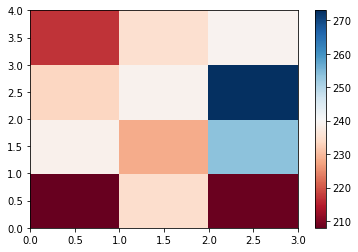

In [34]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

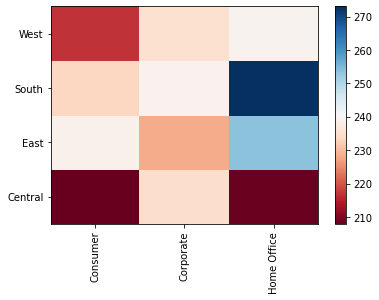

In [35]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# nama label
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# pindahkan ticks and labels ke tenah
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# masukan  labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotasi label
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


In [36]:
grouped_test2=df_gptest[['Region', 'Sales']].groupby(['Region'])
grouped_test2.head(2)

,Region,Sales
0,South,261.960
1,South,731.940
2,West,14.620
5,West,48.860
14,Central,68.810
15,Central,2.544
23,East,71.372
27,East,3083.430


In [37]:
df_gptest

,Region,Segment,Sales
0,South,Consumer,261.9600
1,South,Consumer,731.9400
2,West,Corporate,14.6200
3,South,Consumer,957.5775
4,South,Consumer,22.3680
...,...,...,...
9989,South,Consumer,25.2480
9990,West,Consumer,91.9600
9991,West,Consumer,258.5760
9992,West,Consumer,29.6000


In [39]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('South')['Sales'], grouped_test2.get_group('West')['Sales'], grouped_test2.get_group('East')['Sales'],  grouped_test2.get_group('Central')['Sales'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.8006191034994181 , P = 0.49332032806553516


In [40]:
#South and West
f_val, p_val = stats.f_oneway(grouped_test2.get_group('South')['Sales'], grouped_test2.get_group('West')['Sales'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.6557630678713686 , P = 0.4180997034412003
